<a href="https://colab.research.google.com/github/VitorMazziero/Processos-Fermentativos/blob/main/Modelos%20Cineticos%20para%20Simula%C3%A7%C3%A3o%20-%20Batelada%20Alimentada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Batelada Simples


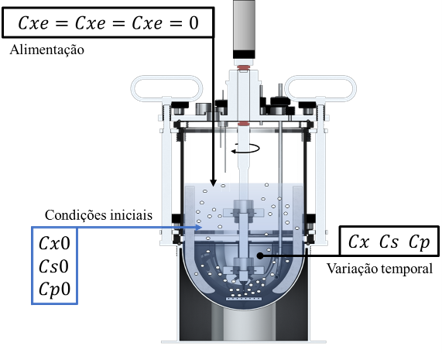

##Balanço de Massa Celular

Acúmulo = Entra - Sai + Geração - Consumo

⠀

Para Batelada Simples o balanço geral é simplificado para: 


> Acúmulo $=$ Geração - Morte

⠀⠀⠀⠀⠀⠀⠀⠀⠀$\therefore$

> ⠀⠀⠀$\frac{\mathrm{dm_{x}} }{\mathrm{d} t} = R_{x} - R_{d}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ Eq. (1)

---
Na qual: **Variação mássica celular = $\frac{\mathrm{dm_{x}} }{\mathrm{d} t}$** ; **Geração mássica celular = $R_{x}$** e **Morte Celular** = $R_{d}$

---

Substituindo massa $m_{x}$ pela concentração celular $C_{x}$ utilizando a relação $C_{x}=\frac{m_{x}}{V}$, a geração celular passa a ser descrita por $r_{x}=\frac{R_{x}}{V}$ e a morte celular por $r_{d}=\frac{R_{d}}{V}$. 

⠀⠀⠀

Como na batelada simples não há variação de volume no biorreator, então $\frac{\mathrm{dC_{x}V} }{\mathrm{d} t}\Rightarrow V\frac{\mathrm{dC_{x}} }{\mathrm{d} t}$. 
⠀

⠀⠀⠀

Assim, a variação da concentração celular com o tempo é descrita pela Eq. (2):

$\frac{\mathrm{dC_{x}V} }{\mathrm{d} t} = R_{x}\Rightarrow V\frac{\mathrm{dC_{x}} }{\mathrm{d} t} =r_{x}V - r_{d}V$

⠀⠀⠀⠀⠀⠀$\therefore$
> $\frac{\mathrm{dC_{x}} }{\mathrm{d} t} =r_{x} - r_{d}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (2)






Uitlizando a relação para reações de primeira ordem tanto para geração de células quanto para a morte:

$r_{x}=\frac{\mathrm{d}[C] }{\mathrm{d} t} = k_{1}[C]^{1}$ 

$r_{d}=-\frac{\mathrm{d}[C] }{\mathrm{d} t} = k_{2}[C]^{1}$ 

---

Na qual: $[C]^{1} = C_{x}$ ; $k_{1}=\mu$ (taxa de crescimento celular) e $k_{2}=k_{d}$ (taxa de morte celular)

---


Chega-se na relação final para a variação da concentração celular:

$\frac{\mathrm{dC_{x}} }{\mathrm{d} t} =\mu C_{x} - k_{d}C_{x}  $

⠀⠀
> $\frac{\mathrm{dC_{x}} }{\mathrm{d} t} =(\mu - k_{d})  C_{x}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (3)




Assim, é definida a função para integração numérica ***Cx_Var*** que descreve a variação de Cx com o tempo

In [ ]:
def Cx_Var(Cx, t, μ, kd):
    dCxdt = (μ-kd)*Cx #Eq. (3)
    return dCxdt

Para $k_{d}$ próximos a zero, rearranja-se e integra-se a Eq. (3):

$\frac{1}{C_{x}}\frac{\mathrm{dC_{x}} }{\mathrm{d} t} =\mu
\mathrm{d}t\Rightarrow\int_{C_{0}}^{C}\frac{1}{C_{x}}\frac{\mathrm{dC_{x}} }{\mathrm{d} t} =\int_{t_{0}}^{t}\mu
\mathrm{d}t $ 

⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀$\therefore$
⠀
> $ln(C_{x}-C_{0})=\mu (t-t_{0})$⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ Eq. (4)

---
Na qual: **Tempo Inicial** $= t_{0}$ e **Concentração inicial** $= C_{0}$ ⠀⠀⠀

---

Aplicando exponencial à Eq. (4) chega-se na relação final dada pela equação a seguir:

> $C_{x}=C_{0}+e^{\mu (t-t_{0})}$



##Balanço de Massa de Substrato

Acúmulo = Entra - Sai + Geração - Consumo

⠀

Para Batelada Simples o balanço geral de substrato é simplificado para: 


> Acúmulo $=$ $-$Consumo

⠀⠀⠀⠀⠀⠀⠀⠀⠀$\therefore$

> $\frac{\mathrm{dm_{s}} }{\mathrm{d} t} = -R_{s} = -r_{s}V$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ Eq. (5)

---
Na qual: **Variação mássica de substrato = $\frac{\mathrm{dm_{s}} }{\mathrm{d} t}$** e **Consumo de substrato = $R_{s}$**

---

De modo análogo a concentração celular, a variação da concentração de substrato é ditada pela taxa $r_{s}$, que é expressa pela Eq. (6):


$V\frac{\mathrm{dC_{s}} }{\mathrm{d} t}=-r_{s}V$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (6)

⠀

Para relacionar o consumo de substrato com a formação celular, é necessário definir o **rendimento de crescimento celular** $Y_{\frac{x}{s}}$ (a quantidade de célula que é formada por substrato consumido): 


$Y_{\frac{x}{s}} = \frac{r_{x}}{r_{s}}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (7)


Assim, a variação da concentração de substrato pode ser descrita em função da concentração celular naquele instante, como descrito a seguir:
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀

>$\frac{\mathrm{dC_{s}} }{\mathrm{d} t} =-\frac{r_{x}}{Y_{\frac{x}{s}}}\Rightarrow -\frac{\mu C_{x}}{Y_{\frac{x}{s}}}$            ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (8)

Portanto, a função para integração numérica ***Cs_Var*** que descreve a variação de Cs com o tempo passa a ser dada por:

In [ ]:
def Cs_Var(Cx, t, μ, kd):
    dCsdt = -μ*Cx/Yxs #Eq. (8)
    return dCsdt

##Balanço de Massa de Produto 

Acúmulo = Entra - Sai + Geração - Consumo

⠀

Para Batelada Simples o balanço geral de produto é simplificado para: 


> Acúmulo $=$ Gerado - Degradado

⠀⠀⠀⠀⠀⠀⠀⠀⠀$\therefore$

> $\frac{\mathrm{dm_{p}} }{\mathrm{d} t} = R_{p} - R_{dp} = r_{p}V - r_{dp}V$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ Eq. (9)

---
Na qual: **Variação mássica de produto = $\frac{\mathrm{dm_{p}} }{\mathrm{d} t}$** ; **Geração de produto = $R_{p}$** e **Degradação de produto = $R_{dp}$**

---

De modo análogo a concentração celular, a variação da concentração de produto é ditada pela taxa de formação $r_{p}$ e de degradação $r_{dp}$, que é expressa pela Eq. (10):

⠀

$\frac{\mathrm{dC_{p}} }{\mathrm{d} t}=r_{p} - r_{dp}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (10)

⠀

Para relacionar a geração de produto com a formação celular, é necessário definir seu tipo de geração, que afetará o valor da taxa de formação do produto ($r_{p})$, na qual $\alpha$ e $\beta$ são constantes e $r_{p} = k_{dp}C_{p}$:
⠀

⠀

>**Associado ao crescimento:** ⠀$\frac{\mathrm{dC_{p}} }{\mathrm{d} t} = \alpha \mu C_{x} - k_{dp}C_{p}$  ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (11)

⠀

>**Não associado ao crescimento:** ⠀$\frac{\mathrm{dC_{p}} }{\mathrm{d} t} = \beta C_{x} - k_{dp}C_{p}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (12)

⠀

>**Parcialmente associado ao crescimento:** ⠀$\frac{\mathrm{dC_{p}} }{\mathrm{d} t} =\alpha \mu C_{x} + \beta C_{x} - k_{dp}C_{p}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (13)


Portanto, a função para integração numérica ***Cp_Var*** que descreve a variação de Cp com o tempo passa a ser dada pela função abaixo, na qual a definição das variáveis $\alpha \geq 0 $ ou $\beta \geq 0$ indicarão o tipo de geração do produto:

In [ ]:
def Cp_Var(Cp, t, α, β, Kdp):
    dCpdt = α*μ*C[0]+β*C[0] - Kdp*Cp # Eq (13)
    return dCpdt

##Simulação da variação da concentração para μ constante



Definindo as condições iniciais:

In [ ]:
# Simulação - μ constante

# -*- coding: utf-8 -*-
"""
Created on Wed Sep  7 15:36:42 2022

@author: Vítor Teixeira Mazziero - UNESP Araraquara
"""

import numpy as np

# Condições iniciais
Cx0 = 1.5 # Concentração inicial de células (inóculo) - C[0]
Cs0 = 30 # Concentração inicial de substrato - C[1]
Cp0 = 0 # Concentração inicial de produto - - C[2]

C = [Cx0, Cs0, Cp0]

# Parâmetros para crescimento celular
μmax = μ = 0.25
Kd = 0.05

# Parâmetros para consumo de substrato
Yxs = 0.2

# Parâmetros para formação de produto
α = 0.25
β = 0
Kdp = 0

Criando o vetor de tempo para os limites de integração:

In [ ]:
# Vetor tempo
t=np.arange(0,12.6, 0.1) # Variação do tempo
print(t)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5]


Unindo as funções Cx_Var, Cs_Var e Cp_Var descritas anteriormente em **C_Var** :

In [ ]:
def C_Var(C, t, μ, Kd, Yxs, α, β, Kdp):
    dCxdt = (μ-Kd)*C[0] #Eq. (3)
    dCsdt = - (μ*C[0]/Yxs) #Eq. (8)
    dCpdt = α*μ*C[0]+β*C[0]-Kdp*C[2] #Eq. (13)
    return (dCxdt, dCsdt, dCpdt)

Integrando e gerando os gráficos:

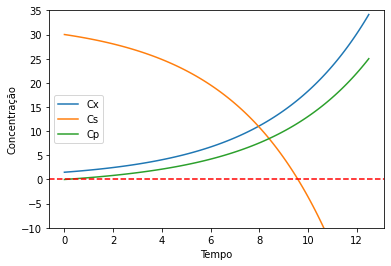

In [ ]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Result = odeint(C_Var, C, t, args=(μ, Kd, Yxs, α, β, Kdp))

plt.plot(t, Result[:, 0], label='Cx')
plt.plot(t, Result[:, 1], label='Cs')
plt.plot(t, Result[:, 2], label='Cp')
plt.axhline(0, color = 'r', linestyle = '--')
plt.ylim([-10, 35])
plt.xlabel('Tempo')
plt.ylabel('Concentração')
plt.legend()
plt.show()

##Simulação da variação da concentração para μ variável

Como observado para μ constante, limitações físicas relacionadas a disponibilidade limitada de nutrientes não são respeitadas pelo modelo, nas quais concentrações negativas de substrato são consideradas.

> Para ter em conta tais limitações físicas, diversos modelos foram propostos pela literatura na qual substituem a taxa de crescimento constante ($\mu$) por uma função dependente da taxa máxima de crescimento microbiano ($\mu_{max}$).




### Modelos cinéticos não estruturados para simulação **sem inibição**

#### (Monod, 1949) 

Descrito em: *Monod, Jacques (1949). "The growth of bacterial cultures". Annual Review of Microbiology. 3: 371–394. DOI: [10.1146/annurev.mi.03.100149.002103](https://https://www.annualreviews.org/doi/10.1146/annurev.mi.03.100149.002103)* o modelo de Monod é dado pela Eq. (14):

⠀

$\mu = \frac{\mu_{max}C_{s} }{K_{s}+C_{s}}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (14)

⠀

A variação da concetração celular e de substrato passam a ser descritas pelas equações a seguir:

$\frac{\mathrm{dC_{x}} }{\mathrm{d} t} = \frac{\mu_{max}C_{s} }{K_{s}+C_{s}}C_{x}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (15)


$\frac{\mathrm{dC_{s}} }{\mathrm{d} t} = -\frac{\mu_{max}C_{s} }{K_{s}+C_{s}}\frac{C_{x}}{Y_{\frac{x}{s}}}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (16)

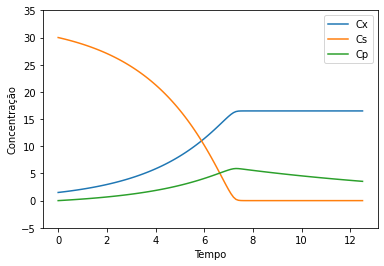

In [ ]:
# Simulação - (Monod, 1949)

# -*- coding: utf-8 -*-
"""
Created on Wed Sep  7 15:36:42 2022

@author: Vítor Teixeira Mazziero - UNESP Araraquara
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Condições iniciais
Cx0 = 1.5 # Concentração inicial de células (inóculo) - C[0]
Cs0 = 30 # Concentração inicial de substrato - C[1]
Cp0 = 0 # Concentração inicial de produto - - C[2]

C = [Cx0, Cs0, Cp0]

# Parâmetros para crescimento celular
μmax = 0.35
Ks = 0.75 # Constante de meia saturação
Kd = 0

# Parâmetros para consumo de substrato
Yxs = 0.5 

# Parâmetros para formação de produto
α = 0.5
β = 0
Kdp = 0.1

# Vetor tempo
t=np.arange(0,12.6, 0.1) # Variação do tempo

def C_Var(C, t, μmax, Ks, Kd, Yxs, α, β, Kdp):
    μ = μmax*(C[1]/(Ks+C[1])) #Eq. (14)
    dCxdt = (μ-Kd)*C[0] 
    dCsdt = - (μ*C[0]/Yxs)
    dCpdt = α*μ*C[0]+β*C[0]-Kdp*C[2]
    return (dCxdt, dCsdt, dCpdt)

Result = odeint(C_Var, C, t, args=(μmax, Ks, Kd, Yxs, α, β, Kdp))

plt.plot(t, Result[:, 0], label='Cx')
plt.plot(t, Result[:, 1], label='Cs')
plt.plot(t, Result[:, 2], label='Cp')
plt.ylim([-5, 35])
plt.xlabel('Tempo')
plt.ylabel('Concentração')
plt.legend()

plt.show()

#### (Moser, 1958)

Descrito em: *Moser, H., 1958. The dynamics of bacterial populations maintained in the chemostat. The dynamics of bacterial populations maintained in the chemostat. pp.136. DOI: [10.1101/sqb.1957.022.01.015](http://symposium.cshlp.org/content/22/121).* O modelo de Moser é dado pela Eq. (17):

⠀

$\mu = \frac{\mu_{max}C_{s}^{n} }{K_{s}+C_{s}^{n}}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (17)

⠀

A variação da concetração celular e de substrato passam a ser descritas pelas equações a seguir:

$\frac{\mathrm{dC_{x}} }{\mathrm{d} t} = \frac{\mu_{max}C_{s}^{n} }{K_{s}+C_{s}^{n}}C_{x}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (18)


$\frac{\mathrm{dC_{s}} }{\mathrm{d} t} = -\frac{\mu_{max}C_{s}^{n} }{K_{s}+C_{s}^{n}}\frac{C_{x}}{Y_{\frac{x}{s}}}$⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (19)

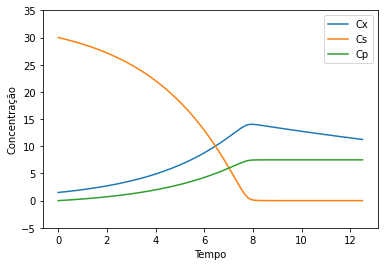

In [ ]:
# Simulação - (Moser, 1958)

# -*- coding: utf-8 -*-
"""
Created on Wed Sep  7 15:36:42 2022

@author: Vítor Teixeira Mazziero - UNESP Araraquara
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Condições iniciais
Cx0 = 1.5 # Concentração inicial de células (inóculo) - C[0]
Cs0 = 30 # Concentração inicial de substrato - C[1]
Cp0 = 0 # Concentração inicial de produto - - C[2]

C = [Cx0, Cs0, Cp0]

# Parâmetros para crescimento celular
μmax = 0.35
Ks = 0.75
Kd = 0.05

# Parâmetros para consumo de substrato
Yxs = 0.5

#Parâmetro de ajuste
n = 1.25

# Parâmetros para formação de produto
α = 0.5
β = 0
Kdp = 0

# Vetor tempo
t=np.arange(0,12.6, 0.1) # Variação do tempo

def C_Var(C, t, μmax, n, Ks, Kd, Yxs, α, β, Kdp):
    μ=((μmax*(C[1])**n))/(Ks+(C[1])**n) #Eq. (17) 
    dCxdt = (μ-Kd)*C[0] 
    dCsdt = - (μ*C[0]/Yxs)
    dCpdt = α*μ*C[0]+β*C[0]-Kdp*C[2]
    return (dCxdt, dCsdt, dCpdt)

Result = odeint(C_Var, C, t, args=(μmax, n, Ks, Kd, Yxs, α, β, Kdp))

plt.plot(t, Result[:, 0], label='Cx')
plt.plot(t, Result[:, 1], label='Cs')
plt.plot(t, Result[:, 2], label='Cp')
plt.ylim([-5, 35])
plt.xlabel('Tempo')
plt.ylabel('Concentração')
plt.legend()
plt.show()

#### (Contois, 1959)

Descrito em: *Contois, D. E. (1959).Kinetics of Bacterial Growth: Relationship between Population Density and Specific Growth Rate of Continuous Cultures J . gen. Microbial. 21: 40-50. DOI: [10.1099/00221287-21-1-40](https://https://www.microbiologyresearch.org/content/journal/micro/10.1099/00221287-21-1-40)*. O modelo de Contois é dado pela Eq. (20):

⠀

$\mu = \frac{\mu_{max}C_{s} }{C_{s}K_{s}+C_{s}}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (20)

⠀

A variação da concetração celular e de substrato passam a ser descritas pelas equações a seguir:

$\frac{\mathrm{dC_{x}} }{\mathrm{d} t} = \frac{\mu_{max}C_{s} }{C_{s}K_{s}+C_{s}}C_{x}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (21)


$\frac{\mathrm{dC_{s}} }{\mathrm{d} t} = -\frac{\mu_{max}C_{s} }{C_{s}K_{s}+C_{s}}\frac{C_{x}}{Y_{\frac{x}{s}}}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (22)

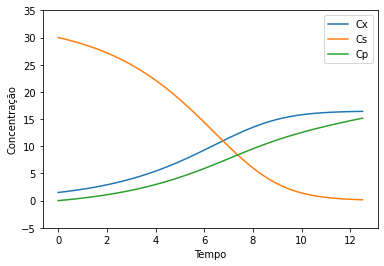

In [ ]:
# Simulação - (Contois, 1959)

# -*- coding: utf-8 -*-
"""
Created on Wed Sep  7 15:36:42 2022

@author: Vítor Teixeira Mazziero - UNESP Araraquara
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Condições iniciais
Cx0 = 1.5 # Concentração inicial de células (inóculo) - C[0]
Cs0 = 30 # Concentração inicial de substrato - C[1]
Cp0 = 0 # Concentração inicial de produto - - C[2]

C = [Cx0, Cs0, Cp0]

# Parâmetros para crescimento celular
μmax = 0.35
Ks = 0.75
Kd = 0

# Parâmetros para consumo de substrato
Yxs = 0.5

# Parâmetros para formação de produto
α = 0.5
β = 0.1
Kdp = 0.05

# Vetor tempo
t=np.arange(0,12.6, 0.1) # Variação do tempo

def C_Var(C, t, μmax, Ks, Kd, Yxs, α, β, Kdp):
    μ=μmax*(C[1]/(Ks*C[0]+C[1])) #Eq. (20)
    dCxdt = (μ-Kd)*C[0] 
    dCsdt = - (μ*C[0]/Yxs)
    dCpdt = α*μ*C[0]+β*C[0]-Kdp*C[2]
    return (dCxdt, dCsdt, dCpdt)

Result = odeint(C_Var, C, t, args=(μmax, Ks, Kd, Yxs, α, β, Kdp))

plt.plot(t, Result[:, 0], label='Cx')
plt.plot(t, Result[:, 1], label='Cs')
plt.plot(t, Result[:, 2], label='Cp')
plt.ylim([-5, 35])
plt.xlabel('Tempo')
plt.ylabel('Concentração')
plt.legend()
plt.show()

#### (Teissier, 1942)

Descrito em: *G. Teissier, Growth of bacterial populations and the available substrate concentration, Rev. Sci. Instrum., 1942, 3208, 209–214* o modelo de Teisseir é dado pela Eq. (24):

⠀

$\mu = {\mu_{max}(1- e^{^{-\frac{C_{s}}{K_{T}}}}})$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀   ⠀⠀⠀⠀Eq. (24)

⠀

A variação da concetração celular e de substrato passam a ser descritas pelas equações a seguir:

$\frac{\mathrm{dC_{x}} }{\mathrm{d} t} = ({\mu_{max}(1- e^{^{-\frac{C_{s}}{K_{T}}}}})-K{d})C_{x}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (25)


$\frac{\mathrm{dC_{s}} }{\mathrm{d} t} = -{\mu_{max}(1- e^{^{\frac{C_{s}}{K_{T}}}}})\frac{C_{x}}{Y_{\frac{x}{s}}}$⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (26)

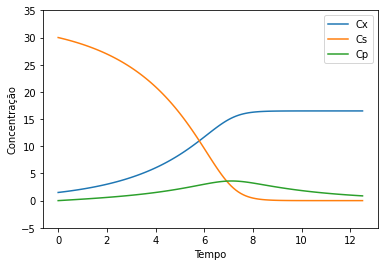

In [ ]:
# Simulação - (Teissier, 1942)

# -*- coding: utf-8 -*-
"""
Created on Wed Sep  7 15:36:42 2022

@author: Vítor Teixeira Mazziero - UNESP Araraquara
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Condições iniciais
Cx0 = 1.5 # Concentração inicial de células (inóculo) - C[0]
Cs0 = 30 # Concentração inicial de substrato - C[1]
Cp0 = 0 # Concentração inicial de produto - - C[2]

C = [Cx0, Cs0, Cp0]

# Parâmetros para crescimento celular
μmax = 0.35
Kd = 0

# Parâmetro de ajuste
KT = 5

# Parâmetros para consumo de substrato
Yxs = 0.5

# Parâmetros para formação de produto
α = 0.5
β = 0.0
Kdp = 0.3

# Vetor tempo
t=np.arange(0,12.6, 0.1) # Variação do tempo

def C_Var(C, t, μmax, KT, Kd, Yxs, α, β, Kdp):
    μ=μmax*(1 - np.exp(-C[1]/KT)) #Eq. (24)
    dCxdt = (μ-Kd)*C[0] 
    dCsdt = - (μ*C[0]/Yxs)
    dCpdt = α*μ*C[0]+β*C[0] - Kdp*C[2]
    return (dCxdt, dCsdt, dCpdt)

Result = odeint(C_Var, C, t, args=(μmax, KT, Kd, Yxs, α, β, Kdp))

plt.plot(t, Result[:, 0], label='Cx')
plt.plot(t, Result[:, 1], label='Cs')
plt.plot(t, Result[:, 2], label='Cp')
plt.ylim([-5, 35])
plt.xlabel('Tempo')
plt.ylabel('Concentração')
plt.legend()
plt.show()

### Modelos cinéticos não estruturados para simulação com **inibição por substrato**

#### (Andrews, 1968)

Descrito em: *Andrews, J. F. (1968). A mathematical model for the continuous culture of microorganisms utilizing inhibitory substrates. Biotechnology and Bioengineering, 10(6), 707–723. DOI: [10.1002/bit.260100602](https://onlinelibrary.wiley.com/doi/abs/10.1002/bit.260100602)* o modelo de Andrews é dado pela Eq. (27):

⠀

$\mu = \frac{\mu_{max}C_{s} }{C_{s} + K_{s} + \frac{C_{s}^{2}}{K_{is}}}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (27)

⠀

A variação da concetração celular e de substrato passam a ser descritas pelas equações a seguir:

$\frac{\mathrm{dC_{x}} }{\mathrm{d} t} = \frac{\mu_{max}C_{s} }{C_{s} + K_{s} + \frac{C_{s}^{2}}{K_{is}}}C_{x}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (28)


$\frac{\mathrm{dC_{s}} }{\mathrm{d} t} = -\frac{\mu_{max}C_{s} }{C_{s} + K_{s} + \frac{C_{s}^{2}}{K_{is}}}\frac{C_{x}}{Y_{\frac{x}{s}}}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (29)

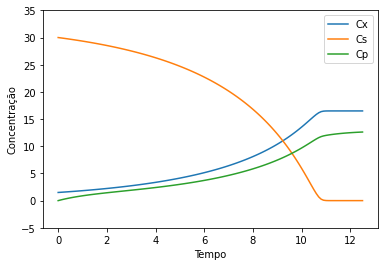

In [ ]:
# Simulação - (Andrews, 1968)

# -*- coding: utf-8 -*-
"""
Created on Wed Sep  7 15:36:42 2022

@author: Vítor Teixeira Mazziero - UNESP Araraquara
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Condições iniciais
Cx0 = 1.5 # Concentração inicial de células (inóculo) - C[0]
Cs0 = 30 # Concentração inicial de substrato - C[1]
Cp0 = 0 # Concentração inicial de produto - - C[2]

C = [Cx0, Cs0, Cp0]

# Parâmetros para crescimento celular
μmax = 0.35
Ks = 0.75
Kd = 0

# Parâmetro de ajuste (constante de inibição de substrato)
Kis = 40

# Parâmetros para consumo de substrato
Yxs = 0.5

# Parâmetros para formação de produto
α = 0.5
β = 0.7
Kdp = 0.9

# Vetor tempo
t=np.arange(0,12.6, 0.1) # Variação do tempo

def C_Var(C, t, μmax, Ks, Kd, Kis, Yxs, α, β, Kdp):
    μ = μmax *(C[1]/(Ks + C[1] + ((C[1]**2)/Kis))) #Eq. (27) 
    dCxdt = (μ-Kd)*C[0] 
    dCsdt = - (μ*C[0]/Yxs)
    dCpdt = α*μ*C[0]+β*C[0] - Kdp*C[2]
    return (dCxdt, dCsdt, dCpdt)

Result = odeint(C_Var, C, t, args=(μmax, Ks, Kd, Kis, Yxs, α, β, Kdp))

plt.plot(t, Result[:, 0], label='Cx')
plt.plot(t, Result[:, 1], label='Cs')
plt.plot(t, Result[:, 2], label='Cp')
plt.ylim([-5, 35])
plt.xlabel('Tempo')
plt.ylabel('Concentração')
plt.legend()
plt.show()

#### (Webb, 1963)

Descrito em: *Webb, J.L., 1963. Enzyme and Metabolic Inhibitors. Academic Press, Boston, USA. DOI: http://dx.doi.org/10.5962/bhl.title.7320.* O modelo de Webb é dado pela Eq. (30):

⠀

$\mu = \frac{\mu_{max}C_{s}(1+\frac{C_{s}}{K_{is}})}{C_{s}+K_{s}+\frac{C_{s}^{2}}{K_{is}}}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ ⠀⠀Eq. (30)

⠀

A variação da concetração celular e de substrato passam a ser descritas pelas equações a seguir:

$\frac{\mathrm{dC_{x}} }{\mathrm{d} t} = \frac{\mu_{max}C_{s}(1+\frac{C_{s}}{K_{is}})}{C_{s}+K_{s}+\frac{C_{s}^{2}}{K_{is}}}C_{x}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (31)


$\frac{\mathrm{dC_{s}} }{\mathrm{d} t} = -\frac{\mu_{max}C_{s}(1+\frac{C_{s}}{K_{is}})}{C_{s}+K_{s}+\frac{C_{s}^{2}}{K_{is}}}\frac{C_{x}}{Y_{\frac{x}{s}}}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (32)

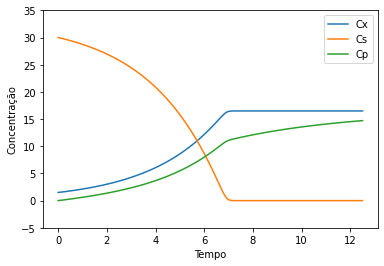

In [ ]:
# Simulação - (Webb, 1963)

# -*- coding: utf-8 -*-
"""
Created on Wed Sep  7 15:36:42 2022

@author: Vítor Teixeira Mazziero - UNESP Araraquara
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Condições iniciais
Cx0 = 1.5 # Concentração inicial de células (inóculo) - C[0]
Cs0 = 30 # Concentração inicial de substrato - C[1]
Cp0 = 0 # Concentração inicial de produto - - C[2]

C = [Cx0, Cs0, Cp0]

# Parâmetros para crescimento celular
μmax = 0.35
Ks = 0.75
Kd = 0

# Parâmetro de ajuste (inibição)
Kis = 1.5

# Parâmetros para consumo de substrato
Yxs = 0.5

# Parâmetros para formação de produto
α = 0.5
β = 0.2
Kdp = 0.2

# Vetor tempo
t=np.arange(0,12.6, 0.1) # Variação do tempo

def C_Var(C, t, μmax, Ks, Kd, Kis, Yxs, α, β, Kdp):
    μ = μmax *(C[1]*(1+(C[1]/Kis))/(Ks + C[1] + ((C[1]**2)/Kis))) #Eq. (30)
    dCxdt = (μ-Kd)*C[0] 
    dCsdt = - (μ*C[0]/Yxs)
    dCpdt = α*μ*C[0]+β*C[0] - Kdp*C[2]
    return (dCxdt, dCsdt, dCpdt)

Result = odeint(C_Var, C, t, args=(μmax, Ks, Kd, Kis, Yxs, α, β, Kdp))

plt.plot(t, Result[:, 0], label='Cx')
plt.plot(t, Result[:, 1], label='Cs')
plt.plot(t, Result[:, 2], label='Cp')
plt.ylim([-5, 35])
plt.xlabel('Tempo')
plt.ylabel('Concentração')
plt.legend()
plt.show()

#### (Yano e Koga, 1969) 

Descrito em: *Yano, T., Koga, S., 1969. Dynamic behavior of the chemostat subject to substrate inhibition. Biotechnol. Bioeng. 11 (2), 139–153. https://doi.org/10.1002/bit.260110204.* O modelo de Yano e Koga é dado pela Eq. (33):

⠀

$\mu = \frac{\mu_{max}}{\frac{K_{s}}{C_{s}}+\frac{C_{s}^{2}}{K_{is1}}+\frac{C_{s}^{3}}{K_{is2}^{2}}}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (33)

⠀

A variação da concetração celular e de substrato passam a ser descritas pelas equações a seguir:

$\frac{\mathrm{dC_{x}} }{\mathrm{d} t} = \frac{\mu_{max}}{\frac{K_{s}}{C_{s}}+\frac{C_{s}^{2}}{K_{is1}}+\frac{C_{s}^{3}}{K_{is2}^{2}}}C_{x}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (34)


$\frac{\mathrm{dC_{s}} }{\mathrm{d} t} = -\frac{\mu_{max}}{\frac{K_{s}}{C_{s}}+\frac{C_{s}^{2}}{K_{is1}}+\frac{C_{s}^{3}}{K_{is2}^{2}}}\frac{C_{x}}{Y_{\frac{x}{s}}}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (35)

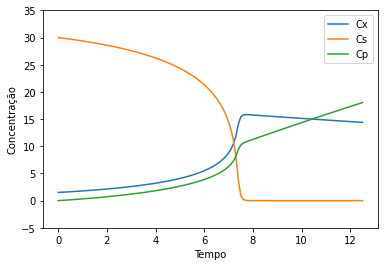

In [ ]:
# Simulação - (Yano e Koga, 1969)

# -*- coding: utf-8 -*-
"""
Created on Wed Sep  7 15:36:42 2022

@author: Vítor Teixeira Mazziero - UNESP Araraquara
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Condições iniciais
Cx0 = 1.5 # Concentração inicial de células (inóculo) - C[0]
Cs0 = 30 # Concentração inicial de substrato - C[1]
Cp0 = 0 # Concentração inicial de produto - - C[2]

C = [Cx0, Cs0, Cp0]

# Parâmetros para crescimento celular
μmax = 0.35
Ks = 0.75
Kd = 0.02

# Parâmetros de ajuste (inibição)
Kis1 = 500
Kis2 = 850

# Parâmetros para consumo de substrato
Yxs = 0.5

# Parâmetros para formação de produto
α = 0.5
β = 0.1
Kdp = 0.0

# Vetor tempo
t=np.arange(0,12.6, 0.1) # Variação do tempo

def C_Var(C, t, μmax, Ks, Kd, Kis1, Kis2, Yxs, α, β, Kdp):
    μ = μmax/((Ks/C[1]) + ((C[1]**2)/Kis1)+((C[1]**3)/Kis2**2)) #Eq. (33)
    dCxdt = (μ-Kd)*C[0] 
    dCsdt = - (μ*C[0]/Yxs)
    dCpdt = α*μ*C[0]+β*C[0] - Kdp*C[2]
    return (dCxdt, dCsdt, dCpdt)

Result = odeint(C_Var, C, t, args=(μmax, Ks, Kd, Kis1, Kis2, Yxs, α, β, Kdp))

plt.plot(t, Result[:, 0], label='Cx')
plt.plot(t, Result[:, 1], label='Cs')
plt.plot(t, Result[:, 2], label='Cp')
plt.ylim([-5, 35])
plt.xlabel('Tempo')
plt.ylabel('Concentração')
plt.legend()
plt.show()

#### (Wu *et al*., 1988) 

Descrito em: *Wu Y.C., Hao O.J., Ou K.C., Scholze R.J., Treatment of leachate
from solid waste landfill site using a two-stage anaerobic filter, Biotechnology Bioengineering, 31, p.257-266 (1988). DOI: https://doi.org/10.1002/bit.260310312*. O modelo de Wu *et al*. é dado pela Eq. (36):

⠀

$\mu = \frac{\mu_{max}}{1+\frac{K_{s}}{C_{s}}+(\frac{C_{s}}{K_{is}})^{n}}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (36)

⠀

A variação da concetração celular e de substrato passam a ser descritas pelas equações a seguir:

$\frac{\mathrm{dC_{x}} }{\mathrm{d} t} = \frac{\mu_{max}}{1+\frac{K_{s}}{C_{s}}+(\frac{C_{s}}{K_{is}})^{n}}C_{x}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (37)


$\frac{\mathrm{dC_{s}} }{\mathrm{d} t} = -\frac{\mu_{max}}{1+\frac{K_{s}}{C_{s}}+(\frac{C_{s}}{K_{is}})^{n}}\frac{C_{x}}{Y_{\frac{x}{s}}}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (38)

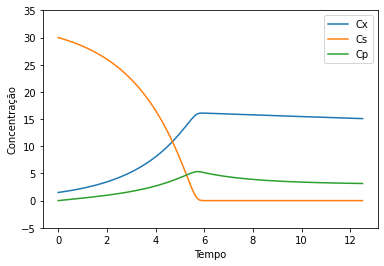

In [ ]:
# Simulação - (Wu et al., 1988)

# -*- coding: utf-8 -*-
"""
Created on Wed Sep  7 15:36:42 2022

@author: Vítor Teixeira Mazziero - UNESP Araraquara
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Condições iniciais
Cx0 = 1.5 # Concentração inicial de células (inóculo) - C[0]
Cs0 = 30 # Concentração inicial de substrato - C[1]
Cp0 = 0 # Concentração inicial de produto - - C[2]

C = [Cx0, Cs0, Cp0]

# Parâmetros para crescimento celular
μmax = 0.5
Ks = 0.9
Kd = 0.01

# Parâmetros de ajuste (inibição)
Kis = 200
n = 1

# Parâmetros para consumo de substrato
Yxs = 0.5

# Parâmetros para formação de produto
α = 0.5
β = 0.1
Kdp = 0.5

# Vetor tempo
t=np.arange(0,12.6, 0.1) # Variação do tempo

def C_Var(C, t, μmax, Ks, Kd, Yxs, α, β, Kdp):
    μ = μmax / (1 + (Ks/C[1]) + (C[1]/Kis)**n) #Eq. (36)
    dCxdt = (μ-Kd)*C[0] 
    dCsdt = - (μ*C[0]/Yxs)
    dCpdt = α*μ*C[0]+β*C[0] - Kdp*C[2]
    return (dCxdt, dCsdt, dCpdt)

Result = odeint(C_Var, C, t, args=(μmax, Ks, Kd, Yxs, α, β, Kdp))

plt.plot(t, Result[:, 0], label='Cx')
plt.plot(t, Result[:, 1], label='Cs')
plt.plot(t, Result[:, 2], label='Cp')
plt.ylim([-5, 35])
plt.xlabel('Tempo')
plt.ylabel('Concentração')
plt.legend()
plt.show()

#### (Han e Levenspiel, 1988)

Descrito em: *Han, K., Levenspiel, O., 1988. Extended Monod kinetics for substrate, product, and cell inhibition. Biotechnol. Bioeng. 32 (4), 430–447. https://doi.org/10.1002/bit.260320404.* O modelo de Han e Levenspiel é dado pela Eq. (39):

⠀

$\mu = \mu_{max}\left[1-\left(\frac{C_{s}}{C_{si}}\right)\right]^{n}\left [\frac{C_{s}}{C_{s}+K_{s}\left(1-\frac{C_{s}}{C_{si}}\right)^{m}}\right]$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (39)

⠀

A variação da concetração celular e de substrato passam a ser descritas pelas equações a seguir:

$\frac{\mathrm{dC_{x}} }{\mathrm{d} t} = \mu_{max}\left[1-\left(\frac{C_{s}}{C_{si}}\right)\right]^{n}\left [\frac{C_{s}}{C_{s}+K_{s}\left(1-\frac{C_{s}}{C_{si}}\right)^{m}}\right]C_{x}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (40)


$\frac{\mathrm{dC_{s}} }{\mathrm{d} t} = -\mu_{max}\left[1-\left(\frac{C_{s}}{C_{si}}\right)\right]^{n}\left [\frac{C_{s}}{C_{s}+K_{s}\left(1-\frac{C_{s}}{C_{si}}\right)^{m}}\right]\frac{C_{x}}{Y_{\frac{x}{s}}}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (41)

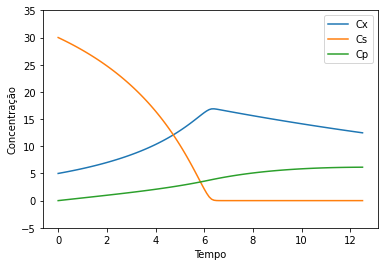

In [ ]:
# Simulação - (Han and Levenspiel, 1988)

# -*- coding: utf-8 -*-
"""
Created on Wed Sep  7 15:36:42 2022

@author: Vítor Teixeira Mazziero - UNESP Araraquara
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Condições iniciais
Cx0 = 5 # Concentração inicial de células (inóculo) - C[0]
Cs0 = 30 # Concentração inicial de substrato - C[1]
Cp0 = 0 # Concentração inicial de produto - - C[2]

C = [Cx0, Cs0, Cp0]

# Parâmetros para crescimento celular
μmax = 0.35
Ks = 0.75
Kd = 0.05

# Parâmetros de ajuste (inibição)
Csi = 200 #Concentração crítica de inibição
n = 3
m = 1.2

# Parâmetros para consumo de substrato
Yxs = 0.5

# Parâmetros para formação de produto
α = 0.0
β = 0.1
Kdp = 0.2

# Vetor tempo
t=np.arange(0,12.6, 0.1) # Variação do tempo

def C_Var(C, t, μmax, Ks, Kd, Csi, n, m, Yxs, α, β, Kdp):
    μ = μmax*((1-(C[1]/Csi))**n)*(C[1]/(C[1]+Ks*(1-(C[1]/Csi))**m)) #Eq. (39)
    dCxdt = (μ-Kd)*C[0] 
    dCsdt = - (μ*C[0]/Yxs)
    dCpdt = α*μ*C[0]+β*C[0] - Kdp*C[2]
    return (dCxdt, dCsdt, dCpdt)

Result = odeint(C_Var, C, t, args=(μmax, Ks, Kd, Csi, n, m, Yxs, α, β, Kdp))

plt.plot(t, Result[:, 0], label='Cx')
plt.plot(t, Result[:, 1], label='Cs')
plt.plot(t, Result[:, 2], label='Cp')
plt.ylim([-5, 35])
plt.xlabel('Tempo')
plt.ylabel('Concentração')
plt.legend()
plt.show()

#### (Luong, 1987)

Descrito em: *Luong, J.H.T., 1987. Generalization of Monod kinetics for analysis of growth data with substrate inhibition. Biotechnol. Bioeng. 29 (2), 242. DOI: [10.1002/bit.260290215](https://pubmed.ncbi.nlm.nih.gov/18576382/)*. O modelo de Luong é dado pela Eq. (42):

⠀

$\mu = \mu_{max}\frac{C_{s}}{C_{s}+K_{s}}\left ( 1- \frac{C_{s}}{C_{si}}\right )^{n}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (42)

⠀

A variação da concetração celular e de substrato passam a ser descritas pelas equações a seguir:

$\frac{\mathrm{dC_{x}} }{\mathrm{d} t} = \mu_{max}\frac{C_{s}}{C_{s}+K_{s}}\left ( 1- \frac{C_{s}}{C_{si}}\right )^{n}C_{x}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (43)


$\frac{\mathrm{dC_{s}} }{\mathrm{d} t} = -\mu_{max}\frac{C_{s}}{C_{s}+K_{s}}\left ( 1- \frac{C_{s}}{C_{si}}\right )^{n}\frac{C_{x}}{Y_{\frac{x}{s}}}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (44)

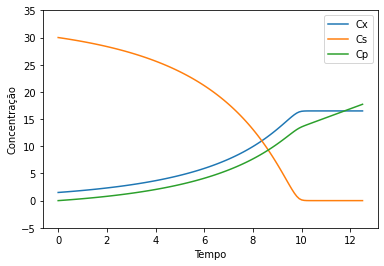

In [ ]:
# Simulação - (Luong, 1987)

# -*- coding: utf-8 -*-
"""
Created on Wed Sep  7 15:36:42 2022

@author: Vítor Teixeira Mazziero - UNESP Araraquara
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Condições iniciais
Cx0 = 1.5 # Concentração inicial de células (inóculo) - C[0]
Cs0 = 30 # Concentração inicial de substrato - C[1]
Cp0 = 0 # Concentração inicial de produto - - C[2]

C = [Cx0, Cs0, Cp0]

# Parâmetros para crescimento celular
μmax = 0.35
Ks = 0.9
Kd = 0

# Parâmetros de ajuste (inibição)
Csi = 150 #Concentração crítica de inibição
n = 2

# Parâmetros para consumo de substrato
Yxs = 0.5

# Parâmetros para formação de produto
α = 0.5
β = 0.1
Kdp = 0

# Vetor tempo
t=np.arange(0,12.6, 0.1) # Variação do tempo

def C_Var(C, t, μmax, Ks, Kd, Csi, n, Yxs, α, β, Kdp):
    μ = μmax*(C[1]/(Ks+C[1]))*(1-(C[1]/Csi))**n #Eq. (42)
    dCxdt = (μ-Kd)*C[0] 
    dCsdt = - (μ*C[0]/Yxs)
    dCpdt = α*μ*C[0]+β*C[0] - Kdp*C[2]
    return (dCxdt, dCsdt, dCpdt)

Result = odeint(C_Var, C, t, args=(μmax, Ks, Kd, Csi, n, Yxs, α, β, Kdp))

plt.plot(t, Result[:, 0], label='Cx')
plt.plot(t, Result[:, 1], label='Cs')
plt.plot(t, Result[:, 2], label='Cp')
plt.ylim([-5, 35])
plt.xlabel('Tempo')
plt.ylabel('Concentração')
plt.legend()
plt.show()

### Modelos cinéticos não estruturados para simulação com **inibição por produto**

#### (Hoppe e Hansford, 1982)

Descrito em: *Hoppe G.K., Hansford G.S., Ethanol inhibition of continuous
anaerobic yeast growth, Biotechnology Letters, 4, p.39-44 (1982). https://doi.org/10.1007/BF00139280*. O modelo de Hoppe e Hansford é dado pela Eq. (45):

⠀

  $\mu = \mu_{max}\frac{C_{s}}{C_{s}+K_{s}}\frac{K_{p}}{K_{p}+{C_{p}}}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (45)

⠀

A variação da concetração celular e de substrato passam a ser descritas pelas equações a seguir:

$\frac{\mathrm{dC_{x}} }{\mathrm{d} t} = \mu_{max}\frac{C_{s}}{C_{s}+K_{s}}\frac{K_{p}}{K_{p}+{C_{p}}}C_{x}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (46)


$\frac{\mathrm{dC_{s}} }{\mathrm{d} t} = -\mu_{max}\frac{C_{s}}{C_{s}+K_{s}}\frac{K_{p}}{K_{p}+{C_{p}}}\frac{C_{x}}{Y_{\frac{x}{s}}}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (47)

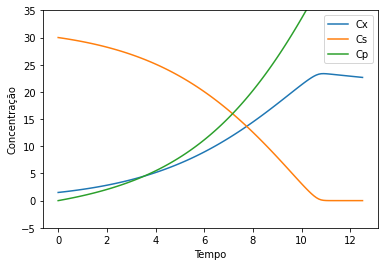

In [ ]:
# Simulação - (Hoppe e Hansford, 1982)

# -*- coding: utf-8 -*-
"""
Created on Tue Nov  8 15:36:42 2022

@author: Vítor Teixeira Mazziero - UNESP Araraquara
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Condições iniciais
Cx0 = 1.5 # Concentração inicial de células (inóculo) - C[0]
Cs0 = 30 # Concentração inicial de substrato - C[1]
Cp0 = 0 # Concentração inicial de produto - - C[2]

C = [Cx0, Cs0, Cp0]

# Parâmetros para crescimento celular
μmax = 0.35
Ks = 0.5
Kd = 0.02

# Parâmetros para consumo de substrato
Yxs = 0.8

# Parâmetros para formação de produto
α = 0.1
β = 0.5
Kdp = 0.1

#Parâmetro de inibição por produto
Kip = 50

# Vetor tempo
t=np.arange(0,12.6, 0.1) # Variação do tempo

def C_Var(C, t, μmax, Ks, Kd, Kip, Yxs, α, β, Kdp):
    μ=μmax*(C[1]/(Ks+C[1]))*(Kip/(Kip+C[2])) #Eq. (45)
    dCxdt = (μ-Kd)*C[0] 
    dCsdt = - (μ*C[0]/Yxs)
    dCpdt = α*μ*C[0]+β*C[0] - Kdp*C[2]
    return (dCxdt, dCsdt, dCpdt)

Result = odeint(C_Var, C, t, args=(μmax, Ks, Kd, Kip, Yxs, α, β, Kdp))

plt.plot(t, Result[:, 0], label='Cx')
plt.plot(t, Result[:, 1], label='Cs')
plt.plot(t, Result[:, 2], label='Cp')
plt.ylim([-5, 35])
plt.xlabel('Tempo')
plt.ylabel('Concentração')
plt.legend()
plt.show()

#### (Levenspiel, 1980)

Descrito em: *Levenspiel O., The Monod equation: a revisit and a generalization
to product inhibition situations, Biotechnology and Bioengineering, 22, p.1671-1687 (1980). https://doi.org/10.1002/bit.260220810.* O modelo de Levenspiel é dado pela Eq. (48):

⠀

$\mu = \mu_{max}\frac{C_{s}}{C_{s}+K_{s}}\left (1-\frac{C_{p}}{C_{pi}} \right )^{n}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (48)

⠀

A variação da concetração celular e de substrato passam a ser descritas pelas equações a seguir:

$\frac{\mathrm{dC_{x}} }{\mathrm{d} t} = \mu_{max}\frac{C_{s}}{C_{s}+K_{s}}\left (1-\frac{C_{p}}{C_{pi}} \right )^{n}C_{x}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (49)


$\frac{\mathrm{dC_{s}} }{\mathrm{d} t} = -\mu_{max}\frac{C_{s}}{C_{s}+K_{s}}\left (1-\frac{C_{p}}{C_{pi}} \right )^{n}\frac{C_{x}}{Y_{\frac{x}{s}}}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars


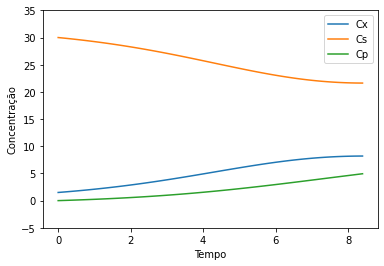

In [ ]:
# Simulação - (Levenspiel, 1980)

# -*- coding: utf-8 -*-
"""
Created on Wed Sep  7 15:36:42 2022

@author: Vítor Teixeira Mazziero - UNESP Araraquara
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Condições iniciais
Cx0 = 1.5 # Concentração inicial de células (inóculo) - C[0]
Cs0 = 30 # Concentração inicial de substrato - C[1]
Cp0 = 0 # Concentração inicial de produto - - C[2]

C = [Cx0, Cs0, Cp0]

# Parâmetros para crescimento celular
μmax = 0.35
Ks = 0.5
Kd = 0.00

# Parâmetros para consumo de substrato
Yxs = 0.8

# Parâmetros para formação de produto
α = 0.1
β = 0.1
Kdp = 0

#Parâmetro de inibição por produto
Cpi = 5 #Concentração de produto de inibição
n = 1.1

# Vetor tempo
t=np.arange(0,12.6, 0.1) # Variação do tempo

def C_Var(C, t, μmax, Ks, Kd, Cpi, n, Yxs, α, β, Kdp):
    μ=μmax*((C[1]/(Ks+C[1]))*((1-(C[2]/Cpi)))**n) #Eq. (48)
    dCxdt = (μ-Kd)*C[0] 
    dCsdt = - (μ*C[0]/Yxs)
    dCpdt = α*μ*C[0]+β*C[0] - Kdp*C[2]
    return (dCxdt, dCsdt, dCpdt)

Result = odeint(C_Var, C, t, args=(μmax, Ks, Kd, Cpi, n, Yxs, α, β, Kdp))

plt.plot(t, Result[:, 0], label='Cx')
plt.plot(t, Result[:, 1], label='Cs')
plt.plot(t, Result[:, 2], label='Cp')
plt.ylim([-5, 35])
plt.xlabel('Tempo')
plt.ylabel('Concentração')
plt.legend()
plt.show()

####  (Aiba *et al*., 1968)

Descrito em: *Aiba S., Shoda M., Nagatani M., Kinetics of product inhibition
in alcohol fermentation, Biotechnology and Bioengineering, 10, p.845-864 (1968). https://doi.org/10.1002/bit.260100610*. O modelo de Aiba *et al.* é dado pela Eq. (51):

⠀

$\mu = \mu_{max}\frac{C_{s}}{C_{s}+K_{s}}e^{-K_{p}C_{p}}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (51)

⠀

A variação da concetração celular e de substrato passam a ser descritas pelas equações a seguir:

$\frac{\mathrm{dC_{x}} }{\mathrm{d} t} = \mu_{max}\frac{C_{s}}{C_{s}+K_{s}}e^{-K_{p}C_{p}}C_{x}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (52)


$\frac{\mathrm{dC_{s}} }{\mathrm{d} t} = -\mu_{max}\frac{C_{s}}{C_{s}+K_{s}}e^{-K_{p}C_{p}}\frac{C_{x}}{Y_{\frac{x}{s}}}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (53)

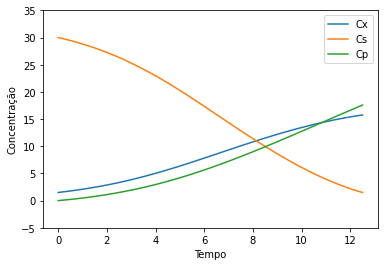

In [ ]:
# Simulação - (Aiba, 1968)

# -*- coding: utf-8 -*-
"""
Created on Wed Sep  7 15:36:42 2022

@author: Vítor Teixeira Mazziero - UNESP Araraquara
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Condições iniciais
Cx0 = 1.5 # Concentração inicial de células (inóculo) - C[0]
Cs0 = 30 # Concentração inicial de substrato - C[1]
Cp0 = 0 # Concentração inicial de produto - - C[2]

C = [Cx0, Cs0, Cp0]

# Parâmetros para crescimento celular
μmax = 0.35
Ks = 0.75
Kd = 0

# Parâmetros para consumo de substrato
Yxs = 0.5

# Parâmetros para formação de produto
α = 0.5
β = 0.1
Kdp = 0

#Parâmetro de inibição por produto
Kip = 0.1 #Constante de inibição por produto

# Vetor tempo
t=np.arange(0,12.6, 0.1) # Variação do tempo

def C_Var(C, t, μmax, Ks, Kd, Kip, Yxs, α, β, Kdp):
    μ=μmax*((C[1]/(Ks+C[1]))*np.exp(-Kip*C[2])) #Eq. (51)
    dCxdt = (μ-Kd)*C[0] 
    dCsdt = - (μ*C[0]/Yxs)
    dCpdt = α*μ*C[0]+β*C[0] - Kdp*C[2]
    return (dCxdt, dCsdt, dCpdt)

Result = odeint(C_Var, C, t, args=(μmax, Ks, Kd, Kip, Yxs, α, β, Kdp))

plt.plot(t, Result[:, 0], label='Cx')
plt.plot(t, Result[:, 1], label='Cs')
plt.plot(t, Result[:, 2], label='Cp')
plt.ylim([-5, 35])
plt.xlabel('Tempo')
plt.ylabel('Concentração')
plt.legend()
plt.show()

### Modelos para simulação com **inibição por células**

####  (Lee *et al*., 1983)

Descrito em: *Lee J.M., Polland J.F., Coulman G.A., Ethanol fermentation
with cell recycling: computer simulation, Biotechnology and
Bioengineering, 25, p.497-511 (1983). https://doi.org/10.1002/bit.260250215.* O modelo de Lee *et al.* é dado pela Eq. (54):

⠀

$\mu = \mu_{max}\frac{C_{s}}{C_{s}+K_{s}}\left (1-\frac{C_{x}}{C_{xi}} \right )^{m}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (54)

⠀

A variação da concetração celular e de substrato passam a ser descritas pelas equações a seguir:

$\frac{\mathrm{dC_{x}} }{\mathrm{d} t} = \mu_{max}\frac{C_{s}}{C_{s}+K_{s}}\left (1-\frac{C_{x}}{C_{xi}} \right )^{m}C_{x}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (55)


$\frac{\mathrm{dC_{s}} }{\mathrm{d} t} = -\mu_{max}\frac{C_{s}}{C_{s}+K_{s}}\left (1-\frac{C_{x}}{C_{xi}} \right )^{m}\frac{C_{x}}{Y_{\frac{x}{s}}}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (56)

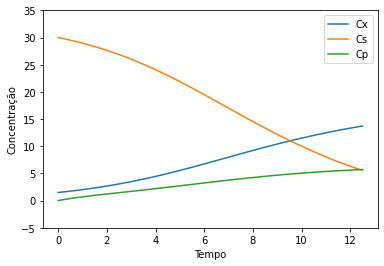

In [ ]:
# Simulação - (Lee et al., 1983)

# -*- coding: utf-8 -*-
"""
Created on Wed Sep  7 15:36:42 2022

@author: Vítor Teixeira Mazziero - UNESP Araraquara
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Condições iniciais
Cx0 = 1.5 # Concentração inicial de células (inóculo) - C[0]
Cs0 = 30 # Concentração inicial de substrato - C[1]
Cp0 = 0 # Concentração inicial de produto - - C[2]

C = [Cx0, Cs0, Cp0]

# Parâmetros para crescimento celular
μmax = 0.35
Ks = 0.75
Kd = 0

#Parâmetros de inibição por crescimento celular
Cxi = 20
m = 1.5

# Parâmetros para consumo de substrato
Yxs = 0.5

# Parâmetros para formação de produto
α = 0.9
β = 0.3
Kdp = 0.8

# Vetor tempo
t=np.arange(0,12.6, 0.1) # Variação do tempo

def C_Var(C, t, μmax, Cxi, m, Ks, Kd, Yxs, α, β, Kdp):
    μ=μmax*((C[1]/(Ks+C[1]))*((abs(1-(C[0]/Cxi)))**m)) #Eq. (54)
    dCxdt = (μ-Kd)*C[0] 
    dCsdt = - (μ*C[0]/Yxs)
    dCpdt = α*μ*C[0]+β*C[0] - Kdp*C[2]
    return (dCxdt, dCsdt, dCpdt)

Result = odeint(C_Var, C, t, args=(μmax, Cxi, m, Ks, Kd, Yxs, α, β, Kdp))

plt.plot(t, Result[:, 0], label='Cx')
plt.plot(t, Result[:, 1], label='Cs')
plt.plot(t, Result[:, 2], label='Cp')
plt.ylim([-5, 35])
plt.xlabel('Tempo')
plt.ylabel('Concentração')
plt.legend()
plt.show()